In [4]:
#import matplotlib 
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [5]:
import numpy as np
import pandas as pd

In [52]:
import datetime as dt
from datetime import timedelta

In [6]:
# Python SQL toolkit and ORM
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [11]:
#create engine
engine = create_engine("sqlite:///Resources/hawaii.sqlite copy")

In [12]:
#declare base using auto_map()
base = automap_base()

In [13]:
#use basae class to reflect database tables
base.prepare(engine, reflect = True)

In [14]:
#print classes mapped to base
base.classes.keys()

['measurement', 'station']

In [15]:
#assing class to variable 
measurement = base.classes.measurement
station = base.classes.station

In [16]:
#create session
session = Session(engine)

In [17]:
#create inspector and connect to engine
inspector = inspect(engine)

In [24]:
#use the inspector to print column name within measurement 
columns = inspector.get_columns('measurement')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [34]:
#display row column data as dictionary
first = session.query(measurement).first()
first.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fd40f8584e0>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1}

In [48]:
#last point in database
last = session.query(measurement.date).order_by(measurement.date.desc()).first()
last

('2017-08-23')

In [61]:
#calculate the date 1 yr. ago from last point in database
previous = dt.date(2017,8,23) - dt.timedelta(days = 365)
previous

datetime.date(2016, 8, 23)

In [66]:
precip = session.query(measurement.date, measurement.prcp).filter(measurement.date >= previous).all()

In [79]:
#save query results as df and set index to date column
df = pd.DataFrame(precip, columns=['Date', 'Precipitation'])
df.set_index('Date')

,Precipitation
Date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


In [80]:
#sort df by date
df.sort_values('Date')

,Date,Precipitation
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
...,...,...
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08


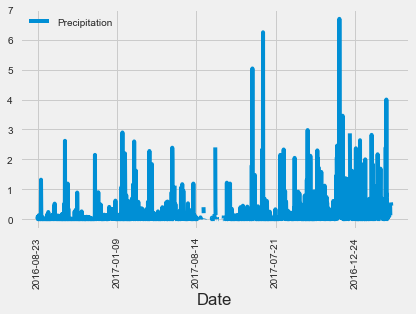

In [95]:
df.plot('Date','Precipitation')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()